Introduction: The purpose of thid project is to collect from 3 data sources, clean for tideness and qualty then combine them into one dtaframe

Process
a)	Gathering data, the data sources will be:
    i)	twitter_archive_enhanced.csv
        (1)	Import data and create DataFrame
        (2)	Inspect data, Confirm the tweet_id column is the appropriate data type (integer), this important as this will be the column used to join the data files.
        (3)	report findings for quality and tidiness deficiencies
        (4)	perform remediations 
b)	image_predictions.tsv
    (1)	import data and create DataFrame
    (2)	inspect data. Confirm the tweet_id column is the appropriate data type (integer), this important as this will be the column used to join the data files.
    (3)	report findings for quality and tidiness deficiencies
    (4)	perform remediations         
c)	tweet_json.txt
    (1)	import data and create DataFrame
    (2)	inspect data. Confirm the tweet_id column is the appropriate data type (integer), this important as this will be the column used to join the data files.
    (3)	report findings for quality and tidiness deficiencies
    (4)	perform remediations

   

# Data Gathering
    WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)
    tweet image prediction (image_predictions.tsv)
    Tweets Data

In [1]:
#import needed libraries ( will not be accessing twitter data directly )
import requests 
import tweepy 
import json  
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

## Import Twitter Archive data

In [2]:
# Import Twitter Archive data,twitter_archive data is a provided file, so this will be a straight forward matter of loading the .CSV file
# ta_tf == Twitter Archive DataFrame
ta_df = pd.read_csv\
('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv')
# confirm dataframe creation
ta_df.shape

(2356, 17)

## Import image predictions

In [3]:
#import image  predictions file using requests
url=('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
x = requests.get(url)
open('image_predictions.tsv', 'wb').write(x.content)
#IP_df =+ image predictions dataframe
IP_df = pd.read_csv('image_predictions.tsv', sep = '\t')
# confirm dataframe
IP_df.shape

(2075, 12)

## import tweets and create Json file

In [4]:
#As there were issues with my Twitter Developer account, I used the tweet-json file to build a Json file;
#variables of intrest are tweet_id, retweet_count, favorite_count
tweets_list =[]

with open('/Users/michaelmohle/Desktop/wrangle/tweet-json.txt') as json_file:
    for line in json_file:
    
        tweets_dict = {}
        tweets_json = json.loads(line)
        
        try:
            tweets_dict['tweet_id'] = tweets_json['extended_entities']['media'][0]['id']
        except:
            tweets_dict['tweet_id'] = 'na'

        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        
        tweets_list.append(tweets_dict)
#convert dictionary to datafrane
tweets_df = pd.DataFrame(tweets_list)
# confirm dataframe
tweets_df.shape

(2354, 3)

# Assess and evaluate data
For each of the 3 data files the file head and info will be inspected. Based upon the resukts addional inspections may be made,

In [5]:
ta_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
ta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
IP_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
IP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
tweets_df.head()

,tweet_id,retweet_count,favorite_count
0,892420639486877696,8853,39467
1,892177413194625024,6514,33819
2,891815175371796480,4328,25461
3,891689552724799489,8964,42908
4,891327551943041024,9774,41048


In [10]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


## Tideness issues
1. For twitter-archive: Dog catagory values are spread accross the doggo, floofer, pupper, and puppo columns
2. For twitter-archive: Retweet/In Reply rows could potentialy refer to already exsisting tweet rows thus raising the prospect of multiple rows with same original tweet ID

## Quality issues
1. For twitter-archive numerator ratings: some values lie outside the 1-10 range thus skewing the data
2. For twitter-archive denominator ratings: some values lie outside the 1-10 range thus skewing the data. in one case the value is zero thus amaking any calculated value using this data problematic.
3. For twitter-archive: In some cases there may be multiple values for a row in doggo, floofer, pupper, and puppo columns, this will be determine once the informstion in those 4 columns is transformed from wide to tall.
4. For twitter-archive: In isolation the numeraor and denomenator columns lack value, a new calculated column needs to created that provides a rating value, making it easier to perform analysis.
5. For image predications, some images in the p1 column (highest confidence) have a false value.
6. For image predications: p2, p2_conf, p2_dog, p3, p3_conf, p3_dogare unnessary as we should default to the value with the highest confidence/
7. For Tweets: some values in tweet_id are not integers (this will be the value used to join dataframes
8. Some column headings are unclear (Twitter Archive: source, image  predictions: p1 and will be renamed in the interest of clarity

## Prior to remediation copies of the dataframes will be made.

In [11]:
ta_df_new = ta_df.copy()
IP_df_new = IP_df.copy()
tweets_df_new = tweets_df.copy()

In [12]:
x, y, z = ta_df_new.shape, IP_df_new.shape, tweets_df_new.shape
print(x,y,z)
# confirm copy, expected values: (2356, 17),(2075, 12), (2354, 3) 

(2356, 17) (2075, 12) (2354, 3)


# Data Quality Issue 3
## Note:
Quality issue 3 is  taken out of order aso as to address tideness issues first

## Define Quality Issue 3.
For twitter-archive: In some cases there are multiple values for a row in doggo, floofer, pupper, and puppo columns.


## Remidiation code Quality Issue 3

In [13]:
#check if rows have multiple value aside from none.
multiples = []
for i in range(0, len(ta_df_new.index)):
    if ta_df_new.doggo[i] == 'doggo' and (ta_df_new.floofer[i] == 'floofer' \
                                     or ta_df_new.pupper[i] == 'pupper' \
                                     or ta_df_new.puppo[i] == 'puppo'):
        multiples.append(i)
# print number of rows with multibile values then the row numbers
print(len(multiples))
print(multiples)

14
[191, 200, 460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113]


In [14]:
# starting value, used to confirm the drop
x = ta_df_new.shape
#drop rows with multipile values
ta_df_new.drop(multiples, axis = 0, inplace = True)

# Test remediation code Quality Issue 3

In [15]:
y = ta_df_new.shape
# value after drop, used to confirm the drop
print(x, y)

(2356, 17) (2342, 17)


# Tideness Issue 1
## Define Tideness Issue 1
For twitter-archive: Dog catagory values are spread accross the doggo, floofer, pupper, and puppo columns
## Remidiation code Tideness Issue 1

In [16]:
melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
catogory_columns = [x for x in ta_df_new.columns.tolist() if x not in melt_columns]
ta_df_new = pd.melt(ta_df_new, id_vars = catogory_columns, value_vars = melt_columns, \
                    var_name = 'Type', value_name = 'Dog_type')

In [17]:
#Drop 'Type' column
ta_df_new = ta_df_new.drop('Type', 1)

# Test remediation code Tideness Issue 1

In [18]:
ta_df_new['Dog_type'].value_counts()

None       9002
pupper      245
doggo        83
puppo        29
floofer       9
Name: Dog_type, dtype: int64

# Tideness issue 2
## Define Tideness Issue 2
For twitter-archive: Retweet/In Reply rows could potentially refer to already existing tweet rows thus raising the prospect of multiple rows with same original tweet ID

Determine number of rows to be deleted

In [19]:
#get row count to be dropped
ta_df_new.in_reply_to_status_id.notnull().sum()

308

## Remidiation code Tideness Issue 2

In [22]:
#drop rows with value in 'retweeted_status_id'
ta_df_new.drop(ta_df_new[ta_df_new.in_reply_to_status_id.notnull()].index, inplace = True)


## Test remediation code Tideness Issue 2

In [23]:
ta_df_new.in_reply_to_status_id.notnull().sum()

0

# Quality Issues 1 - 8 (not including 3(above))

# Data Quality Issue 1. 
## Define Quality Issue 1
For twitter-archive numerator ratings: some values lie outside the 1-10 range thus skewing the data

In [24]:
#Determine scope of issue
# get value counts for numerator
ta_df_new['rating_numerator'].value_counts()

12      1920
10      1740
11      1648
13      1140
9        612
8        392
7        208
14       152
5        132
6        128
3         76
4         64
2         36
1         20
45         4
44         4
165        4
420        4
204        4
84         4
60         4
0          4
99         4
75         4
50         4
26         4
121        4
1776       4
144        4
88         4
80         4
24         4
27         4
Name: rating_numerator, dtype: int64

## Remidiation code Quality Issue 1

In [25]:
ta_df_new.loc[ta_df_new['rating_numerator'] > 10, 'rating_numerator'] = 10



## Test remediation code Quality Issue 1

In [26]:

ta_df_new['rating_numerator'].value_counts()

10    6672
9      612
8      392
7      208
5      132
6      128
3       76
4       64
2       36
1       20
0        4
Name: rating_numerator, dtype: int64

# Data Quality Issue 2 
## Define Quality Issue 2
For twitter-archive denominator ratings: some values lie outside the 1-10 range thus skewing the data. 

In [27]:
# determine scope of issue
ta_df_new['rating_denominator'].value_counts()

10     8276
50       12
80        8
11        8
40        4
120       4
2         4
90        4
170       4
20        4
70        4
110       4
150       4
7         4
Name: rating_denominator, dtype: int64

## Remediation code Quality Issue 2

In [28]:
# set all denominator values to 10
ta_df_new['rating_denominator'] = 10


## Test remediation code Quality Issue 2

In [29]:
ta_df_new['rating_denominator'].value_counts()

10    8344
Name: rating_denominator, dtype: int64

## Data Quality Issue 3 
addressed above

# Data Quality Issue 4
## Define Quality Issue 4
For twitter-archive: In isolation the numerator and denominator columns lack value, a new calculated column needs to created that provides a rating value, making it easier to perform analysis.

## Remediation code Quality Issue 4

In [30]:
# create calculated column
ta_df_new['Rating'] = ta_df_new['rating_numerator']/ta_df_new['rating_denominator']

## Test remediation code Quality Issue 4

In [31]:
ta_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8344 entries, 0 to 9367
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    8344 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   8344 non-null   object 
 4   source                      8344 non-null   object 
 5   text                        8344 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               8332 non-null   object 
 10  rating_numerator            8344 non-null   int64  
 11  rating_denominator          8344 non-null   int64  
 12  name                        8344 non-null   object 
 13  Dog_type                    8344 

# Data Quality Issue 5
## Define Quality Issue 5
For image predications, some images in the p1 column (highest confidence) have a false value. As such these rows will be dropped

## Remediation code Quality Issue 5

In [32]:
#determine count of rows to be dropped
IP_df_new['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [34]:
#drop rows where value in p1_dog is false
IP_df_new.drop(IP_df_new[IP_df_new['p1_dog']  == False].index, inplace =
True)


## Test remediation code Quality Issue 5

In [35]:
#confirm drop
IP_df_new['p1_dog'].value_counts()

True    1532
Name: p1_dog, dtype: int64

In [36]:
# inspect p1 for non dog types
IP_df_new['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
groenendael             1
EntleBucher             1
clumber                 1
Scotch_terrier          1
Japanese_spaniel        1
Name: p1, Length: 111, dtype: int64

to the best of my knowledge these are all dog breeds

# Data Quality Issue 6
## Define Quality Issue 6
For image predications: p2, p2_conf, p2_dog, p3, p3_conf, p3_dog are unnecessary as we should default to the value with the highest confidence(p1) as such drop img_num, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog
columns


## Remediation code Quality Issue 6

In [37]:
IP_df_new.drop(['img_num','p1_conf', 'p1_dog', 'p2',\
                   'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], \
                 axis=1, inplace = True)


## Test remediation code Quality Issue 6

In [38]:
#inspect dataFrame expected column value is 3
IP_df_new.shape

(1532, 3)

# Data Quality Issue 7
## Define Quality Issue 7
For the Tweet Json file: some values in tweet_id are not integers (this will be the value used to join dataframes)


## Remediation code Quality Issue 7

In [39]:
#Determine tweet_id values that are not integers,
non_int_tweet_id_index = []

for i in range(0, len(tweets_df_new.tweet_id)):
    if type(tweets_df_new.tweet_id[i]) != int:
        non_int_tweet_id_index.append(i)
print(len(non_int_tweet_id_index))

281


In [41]:
# drop rows without int values in tweet_id
for i in non_int_tweet_id_index:
    tweets_df_new.drop(tweets_df_new[tweets_df_new.index == i].index,
inplace=True)
#reset index
tweets_df_new = tweets_df_new.reset_index()
del tweets_df_new['index']


In [42]:
#reset index
tweets_df_new = tweets_df_new.reset_index()
del tweets_df_new['index']

## Test remediation code Quality Issue 7

In [43]:
#confirm drop
non_int_tweet_id_index = []
for i in range(0, len(tweets_df_new.tweet_id)):
    if type(tweets_df_new.tweet_id[i]) != int:
        non_int_tweet_id_index.append(i)
print(len(non_int_tweet_id_index))

0


# Data Quality Issue 8
Renaming unclear column headings will be addressed when the 5 dataframes are combined. see below

# Additonal remidations .
1) Drop rating_numerator, rating_denominator columns
2) As they will no longer be needed drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp

In [44]:
# drop columns
ta_df_new.drop(['rating_numerator', 'rating_denominator','in_reply_to_status_id', \
                'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',\
                'retweeted_status_timestamp'], \
                 axis=1, inplace = True)

In [45]:
#confirm drop
ta_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8344 entries, 0 to 9367
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       8344 non-null   int64  
 1   timestamp      8344 non-null   object 
 2   source         8344 non-null   object 
 3   text           8344 non-null   object 
 4   expanded_urls  8332 non-null   object 
 5   name           8344 non-null   object 
 6   Dog_type       8344 non-null   object 
 7   Rating         8344 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 586.7+ KB


#reset index
df_tweets_new = df_tweets_new.reset_index()
del df_tweets_new['index']

# Create master data frame
merge 3 dataframes into one master dataaframe

In [46]:
combo_df = pd.merge(ta_df_new, IP_df_new, on =['tweet_id'], how='left')

In [47]:
#confirm merge
combo_df.shape

(8344, 10)

In [48]:
master_df = pd.merge(combo_df, tweets_df_new, on =['tweet_id'], how='left')

In [49]:
#confirm merge
master_df.shape

(8344, 12)

# Data Quality Issue 8
## Define Quality Issue 8
rename unclear columular headings

## Remediation code Quality Issue 8

In [50]:
master_df = master_df.rename(columns = {'p1':'Breed'})

## Test remediation code Quality Issue 8

In [51]:
# inspect new dataframe
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,Dog_type,Rating,jpg_url,Breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,1.0,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,1.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,1.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,1.0,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,1.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,NaN,NaN


In [286]:
#export file
master_df.to_csv('/Users/michaelmohle/Desktop/D309/twitter_archive_master.csv')

In [ ]:
master_df = master_df.rename(columns = {'p1':'Breed'})

In [52]:
# inspect new dataFrame
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,Dog_type,Rating,jpg_url,Breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,1.0,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,1.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,1.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,1.0,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,1.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,NaN,NaN


In [58]:
#export datafrane as part of project srtifsct
master_df.to_csv('/Users/michaelmohle/Desktop/D309/twitter_archive master.csv', index = False)

# Vizualazations of master Dataframe to support findings

Vizualazations of Data
!) most popular dog breed
2) most popular top type



Text(0.5, 1.0, 'Top 5 most Common Dog Breeds')

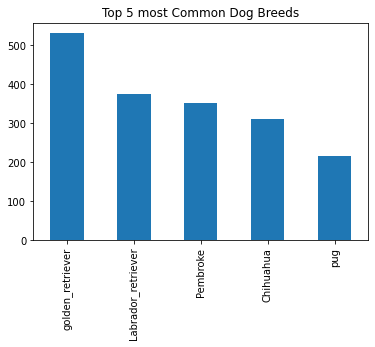

In [54]:
# most popular dog breeds
a = master_df['Breed'].value_counts()[:5]
a.plot(kind ='bar')
plt.title("Top 5 most Common Dog Breeds")

Text(0.5, 1.0, 'Most Common Dog types')

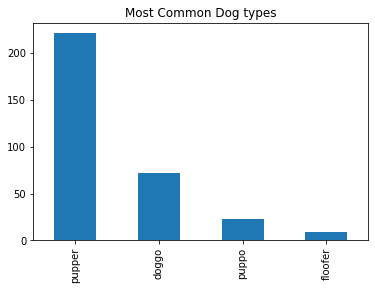

In [55]:
# most popular dog type
a = master_df['Dog_type'].value_counts()[1:5]
a.plot(kind ='bar')
plt.title("Most Common Dog types")

In [77]:
master_df['retweet_count'].value_counts()

Series([], Name: retweet_count, dtype: int64)

Text(0.5, 1.0, 'Highest rated Catagory')

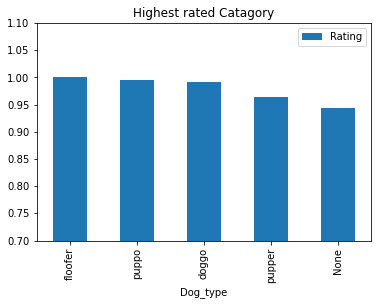

In [57]:
x = pd.pivot_table (master_df, index =['Dog_type'],\
                    values = ['Rating'], \
                    aggfunc = np.mean ).sort_values ('Rating',ascending=False)

x.plot(kind ='bar')
plt.ylim(.7,1.1)
plt.title("Highest rated Catagory")